In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import os

In [3]:
main_cwd = '/Users/yanting/OneDrive/Desktop/2023_11_18 Hackathon/2023_11_18-SE-Europe-Data_Challenge'
os.chdir(main_cwd)

os.chdir('./data')
df_main = pd.read_csv('processed_data.csv')
df_main.columns

Index(['SP_load_MAW', 'timestamp', 'DE_B09_MAW', 'DE_B20_MAW', 'SE_load_MAW',
       'NE_B20_MAW', 'NE_B18_MAW', 'NE_B19_MAW', 'DK_load_MAW', 'DE_B18_MAW',
       ...
       'PO_green_surplus_MAW', 'HU_green_MAW', 'HU_green_surplus_MAW',
       'IT_green_MAW', 'IT_green_surplus_MAW', 'UK_green_MAW',
       'UK_green_surplus_MAW', 'max_surplus_country_name',
       'max_surplus_country_code', 'max_surplus_country_code_next_hr'],
      dtype='object', length=136)

In [4]:
relevant_cols = ['timestamp'] + [col for col in df_main.columns if ('load' in col or 'green' in col or 'surplus' in col)]
df_simp = df_main[relevant_cols]

df_simp.set_index('timestamp', inplace=True)
df_simp.index = pd.to_datetime(df_simp.index)

print(len(df_simp))
print(df_simp.columns)

8761
Index(['SP_load_MAW', 'SE_load_MAW', 'DK_load_MAW', 'PO_load_MAW',
       'NE_load_MAW', 'UK_load_MAW', 'IT_load_MAW', 'DE_load_MAW',
       'HU_load_MAW', 'SP_green_MAW', 'SP_green_surplus_MAW', 'DE_green_MAW',
       'DE_green_surplus_MAW', 'SE_green_MAW', 'SE_green_surplus_MAW',
       'NE_green_MAW', 'NE_green_surplus_MAW', 'DK_green_MAW',
       'DK_green_surplus_MAW', 'PO_green_MAW', 'PO_green_surplus_MAW',
       'HU_green_MAW', 'HU_green_surplus_MAW', 'IT_green_MAW',
       'IT_green_surplus_MAW', 'UK_green_MAW', 'UK_green_surplus_MAW',
       'max_surplus_country_name', 'max_surplus_country_code',
       'max_surplus_country_code_next_hr'],
      dtype='object')


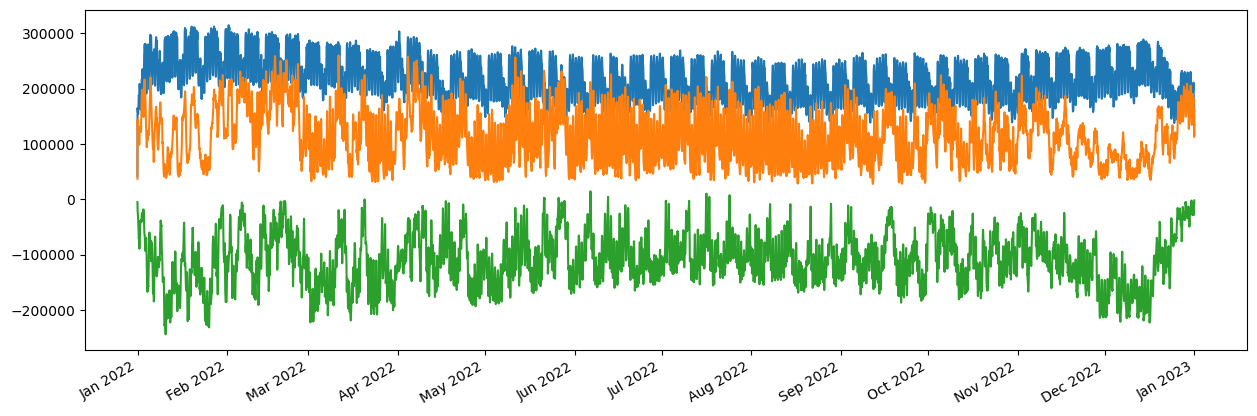

In [5]:
plt.figure(figsize=(15,5))

# plt.plot(df_simp['UK_load_MAW'])
# plt.plot(df_simp['UK_green_MAW'])
# plt.plot(df_simp['UK_green_surplus_MAW'])

plt.plot(df_simp['DE_load_MAW'])
plt.plot(df_simp['DE_green_MAW'])
plt.plot(df_simp['DE_green_surplus_MAW'])

# Set x-axis locator and formatter for monthly labels
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Rotate x-axis labels for better readability
plt.gcf().autofmt_xdate()

plt.show()

In [22]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

def adf_test(timeseries):

    # print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")

    return dftest

    # print(f"p-val = {dftest[1]}")

    # dfoutput = pd.Series(
    #     dftest[0:4],
    #     index=[
    #         "Test Statistic",
    #         "p-value",
    #         "#Lags Used",
    #         "Number of Observations Used",
    #     ],
    # )

    # for key, value in dftest[4].items():
    #     dfoutput["Critical Value (%s)" % key] = value
    # print(dfoutput)

def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")

    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

In [32]:
dfs = []

cols = df_simp.columns[:5]
print(cols)

# Loop through columns
for col in cols:

    try :
        # Perform ADF test
        result = adfuller(df_simp[col])
        p_value = result[1]
        stationary = p_value > 0.05  # Set the significance level as needed

        # Append results to the new DataFrame
        df_temp = pd.DataFrame({'Power Type': [col], 
                                'P-Value': [p_value], 
                                'Stationary': [stationary]})
        
        dfs.append(df_temp)

    except Exception as e :
        print(f'Error for column {col}: {e}')

Index(['SP_load_MAW', 'SE_load_MAW', 'DK_load_MAW', 'PO_load_MAW',
       'NE_load_MAW'],
      dtype='object')


In [33]:
adf_results = pd.concat(dfs, df_temp)

# Display the results DataFrame
print(adf_results)

/var/folders/hy/gj03fhbj5wg417124pmms5t80000gn/T/ipykernel_14575/2977013540.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  adf_results = pd.concat(dfs, df_temp)


TypeError: unhashable type: 'Series'